In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

%matplotlib inline

In [4]:
data = pd.read_csv('total.csv')
data

,date,total_sales
0,1/10/2018,"37,604,000"
1,2/10/2018,"108,434,636"
2,3/10/2018,"127,535,244"
3,4/10/2018,"55,082,128"
4,5/10/2018,"68,561,872"
...,...,...
2191,27/02/2025,"25,388,000"
2192,28/02/2025,"721,050,000"
2193,1/3/2025,"141,828,000"
2194,2/3/2025,"31,921,000"


# Tiền xử lý dữ liệu

In [5]:
data.dtypes # Kiểm tra loại dữ liệu của từng đặc trưng

date           object
total_sales    object
dtype: object

In [6]:
# Chuyển đổi dữ liệu từ dạng chuỗi (String) xuống dạng số 
data['total_sales'] = data['total_sales'].str.replace(",", "").astype(float)

In [7]:
# Định dạng lại dữ liệu ngày tháng năm
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

### Kết quả tiền xử lý

In [8]:
data

,date,total_sales
0,2018-10-01,37604000.0
1,2018-10-02,108434636.0
2,2018-10-03,127535244.0
3,2018-10-04,55082128.0
4,2018-10-05,68561872.0
...,...,...
2191,2025-02-27,25388000.0
2192,2025-02-28,721050000.0
2193,2025-03-01,141828000.0
2194,2025-03-02,31921000.0


In [9]:
data.dtypes

date           datetime64[ns]
total_sales           float64
dtype: object

In [10]:
data.index = data['date'] # Biến index của tập dữ liệu thành ngày tháng năm
data = data.sort_index(ascending=True)

Text(0.5, 1.0, 'Doanh thu của Solomon International')

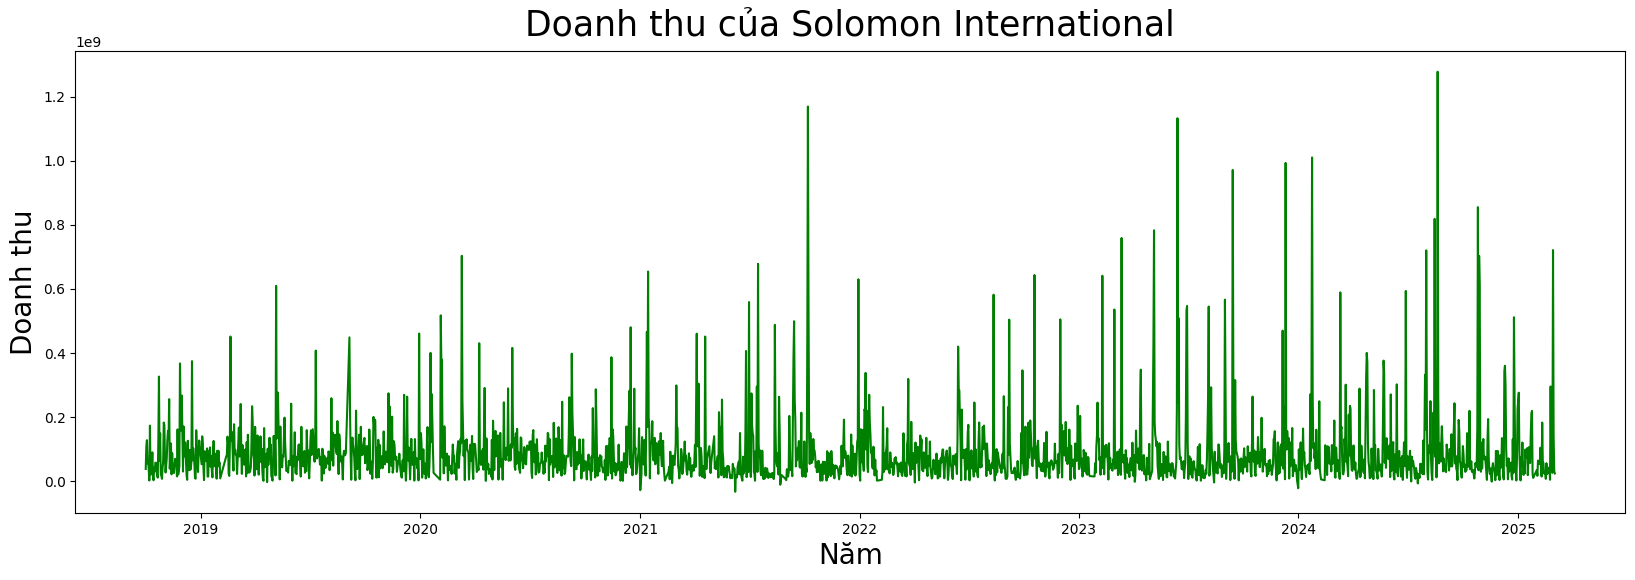

In [19]:
plt.figure(figsize=(20,6))
plt.plot(data['total_sales'], color='g')
plt.xlabel('Năm',size=20)
plt.ylabel('Doanh thu',size=20)
plt.title('Doanh thu của Solomon International',size=25, pad=10)

## Biến đổi dữ liệu

In [17]:
data_diff = data.copy()

In [18]:
# Lấy doanh thu ngày trước
data_diff['prev_sales'] = data_diff['total_sales'].shift(1)

# Bỏ dữ liệu rỗng
data_diff = data_diff.dropna()

# Khác biệt doanh thu với doanh thu ngày trước
data_diff['diff'] = (data_diff['total_sales'] - data_diff['prev_sales'])

data_diff.head(10)

,date,total_sales,prev_sales,diff
date,,,,
2018-10-02,2018-10-02,108434636.0,37604000.0,70830636.0
2018-10-03,2018-10-03,127535244.0,108434636.0,19100608.0
2018-10-04,2018-10-04,55082128.0,127535244.0,-72453116.0
2018-10-05,2018-10-05,68561872.0,55082128.0,13479744.0
2018-10-06,2018-10-06,31912000.0,68561872.0,-36649872.0
2018-10-07,2018-10-07,1620000.0,31912000.0,-30292000.0
2018-10-08,2018-10-08,173001732.0,1620000.0,171381732.0
2018-10-09,2018-10-09,19926000.0,173001732.0,-153075732.0
2018-10-10,2018-10-10,46086000.0,19926000.0,26160000.0


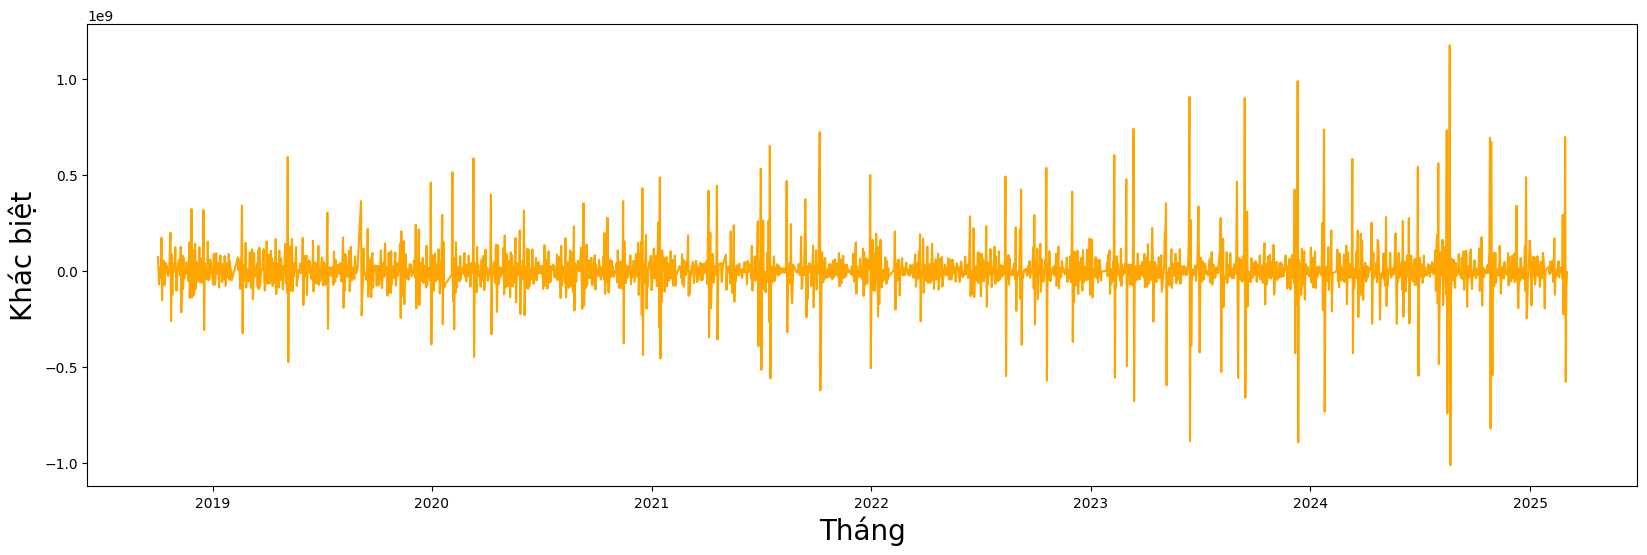

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(data_diff['diff'], color='orange')
plt.xlabel('Tháng', size=20)
plt.ylabel('Khác biệt',size=20)
plt.show()

In [23]:
data_supervised = data_diff.drop(['prev_sales'],axis=1)

# Độ trễ dữ liệu
lag = 40

# Thêm độ trễ dữ liệu
for inc in range(1,lag+1):
    field_name = 'lag_' + str(inc)
    data_supervised[field_name] = data_supervised['diff'].shift(inc)

# Bỏ dữ liệu rỗng
data_supervised = data_supervised.dropna().reset_index(drop=True)

In [24]:
data_supervised

,date,total_sales,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_31,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39,lag_40
0,2018-11-13,20971000.0,-96188230.0,78782376.0,-217285146.0,123640952.0,-23644952.0,28480000.0,56463000.0,44179000.0,...,-9080128.0,26160000.0,-153075732.0,171381732.0,-30292000.0,-36649872.0,13479744.0,-72453116.0,19100608.0,70830636.0
1,2018-11-14,86859000.0,65888000.0,-96188230.0,78782376.0,-217285146.0,123640952.0,-23644952.0,28480000.0,56463000.0,...,52539308.0,-9080128.0,26160000.0,-153075732.0,171381732.0,-30292000.0,-36649872.0,13479744.0,-72453116.0,19100608.0
2,2018-11-15,45570000.0,-41289000.0,65888000.0,-96188230.0,78782376.0,-217285146.0,123640952.0,-23644952.0,28480000.0,...,-76237180.0,52539308.0,-9080128.0,26160000.0,-153075732.0,171381732.0,-30292000.0,-36649872.0,13479744.0,-72453116.0
3,2018-11-16,44142000.0,-1428000.0,-41289000.0,65888000.0,-96188230.0,78782376.0,-217285146.0,123640952.0,-23644952.0,...,-10926000.0,-76237180.0,52539308.0,-9080128.0,26160000.0,-153075732.0,171381732.0,-30292000.0,-36649872.0,13479744.0
4,2018-11-17,24954000.0,-19188000.0,-1428000.0,-41289000.0,65888000.0,-96188230.0,78782376.0,-217285146.0,123640952.0,...,39588000.0,-10926000.0,-76237180.0,52539308.0,-9080128.0,26160000.0,-153075732.0,171381732.0,-30292000.0,-36649872.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2025-02-27,25388000.0,-207534792.0,164854232.0,-227214098.0,291358658.0,-39020000.0,18000000.0,-2266000.0,-5207924.0,...,62402538.0,92234576.0,-7419976.0,-42185704.0,41709016.0,45881718.0,-84359416.0,25049613.0,5826085.0,-26471069.0
2151,2025-02-28,721050000.0,695662000.0,-207534792.0,164854232.0,-227214098.0,291358658.0,-39020000.0,18000000.0,-2266000.0,...,8038550.0,62402538.0,92234576.0,-7419976.0,-42185704.0,41709016.0,45881718.0,-84359416.0,25049613.0,5826085.0
2152,2025-03-01,141828000.0,-579222000.0,695662000.0,-207534792.0,164854232.0,-227214098.0,291358658.0,-39020000.0,18000000.0,...,-196184840.0,8038550.0,62402538.0,92234576.0,-7419976.0,-42185704.0,41709016.0,45881718.0,-84359416.0,25049613.0
2153,2025-03-02,31921000.0,-109907000.0,-579222000.0,695662000.0,-207534792.0,164854232.0,-227214098.0,291358658.0,-39020000.0,...,-13137600.0,-196184840.0,8038550.0,62402538.0,92234576.0,-7419976.0,-42185704.0,41709016.0,45881718.0,-84359416.0


# Sử dụng học máy để dự đoán doanh thu

In [25]:
test_size = 155 # Số lượng dữ liệu mới nhất (5 tháng từ cuối tháng 9 2024 - đầu tháng 3 2025) làm tập thử

In [26]:
from sklearn.preprocessing import MinMaxScaler

data_model = data_supervised.drop(['total_sales', 'date'], axis=1)
train_set, test_set = data_model[0:-test_size].values, data_model[-test_size:].values

In [27]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)

# Điều chỉnh kích thước tập huấn luyện
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)

# Điều chỉnh kích thước tập thử
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [30]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

### **XGBoost (Regressor)**

##### Tạo mô hình và dự đoán

In [28]:
from xgboost import XGBRegressor


def XGB_(loss, X_train, y_test, X_test):
    model = XGBRegressor(objective=loss, n_estimators = 100, max_depth = 30, learning_rate = 0.1)

    model.fit(np.reshape(X_train, (X_train.shape[0], X_train.shape[2])), y_train)
    y_pred = model.predict(np.reshape(X_test, (X_test.shape[0], X_test.shape[2])))
    return y_pred

In [31]:
xg_preds = XGB_('reg:absoluteerror', X_train, y_train, X_test)

In [32]:
xg_preds = xg_preds.reshape(xg_preds.shape[0], 1, 1)

##### Đảo ngược trình chuẩn hóa

In [33]:
def inverseTrasform(predictions):

    # Xây dựng lại tập thử để đảo ngược trình chuẩn hóa
    pred_test_set = []
    for index in range(0,len(predictions)):
        pred_test_set.append(np.concatenate([predictions[index],X_test[index]],axis=1))
    
    # Điều chỉnh kích thước tập thử
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

    # Đảo ngược trình chuẩn hóa dữ liệu
    pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

    return pred_test_set_inverted

xgpreds = inverseTrasform(xg_preds)

##### Tạo kết quả dự đoán doanh thu từ **các kết quả dự đoán chênh lệch**

In [34]:
def makeResult(inverseddata):
    
    result_list = []
    sales_dates = list(data[-test_size-1:].date)
    act_sales = list(data[-test_size-1:].total_sales)
    for index in range(0,len(inverseddata)):
        result_dict = {}
        result_dict['date'] = sales_dates[index+1]

        # Sự khác biệt/Chênh lệch được dự đoán + dữ liệu doanh thu ngày trước = dự đoán doanh thu ngày hiện tại 
        result_dict['pred_value'] = int(inverseddata[index][0] + act_sales[index])
        result_list.append(result_dict)

    data_result = pd.DataFrame(result_list)
    return data_result

data_result = makeResult(xgpreds)

In [35]:

data_result

,date,pred_value
0,2024-09-23,45152533
1,2024-09-24,58738915
2,2024-09-25,121313249
3,2024-09-26,153448401
4,2024-09-27,51069890
...,...,...
150,2025-02-27,269139041
151,2025-02-28,51380430
152,2025-03-01,372632022
153,2025-03-02,143274311


##### Biểu đồ so sánh

In [55]:
data_result.head()

,date,pred_value
0,2024-09-23,45152533
1,2024-09-24,58738915
2,2024-09-25,121313249
3,2024-09-26,153448401
4,2024-09-27,51069890


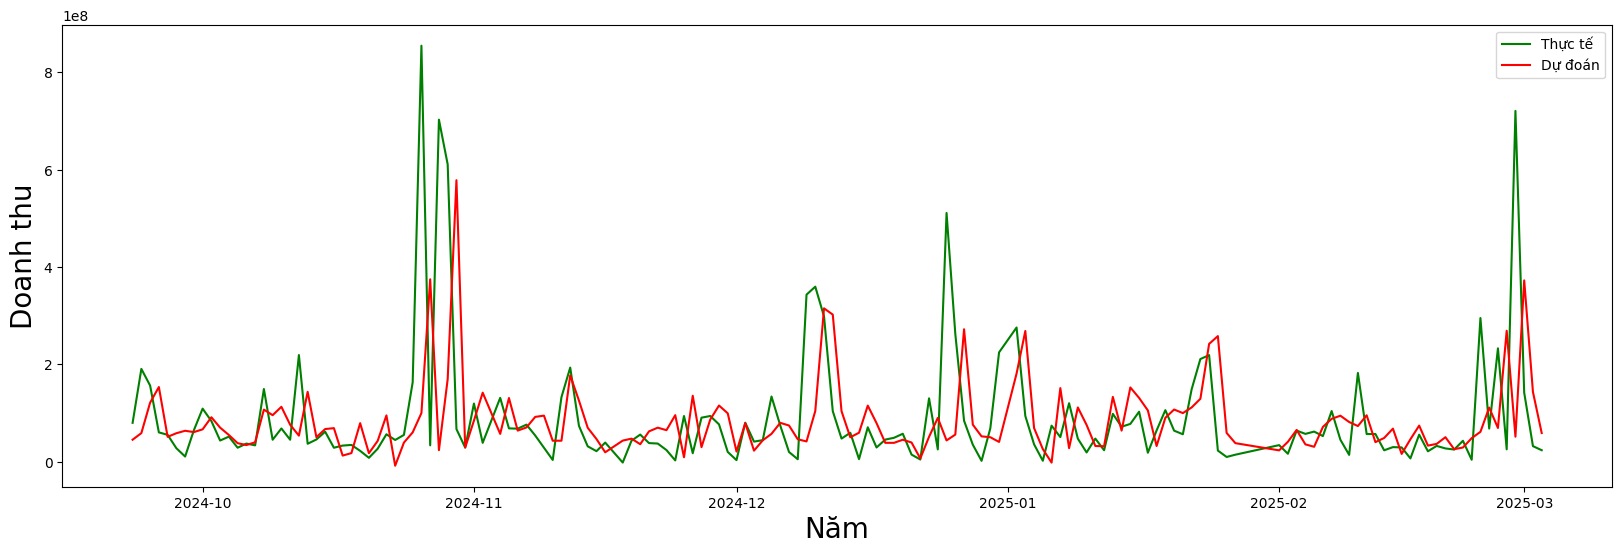

In [54]:
data.reset_index(drop = True, inplace = True)
data_result.reset_index(drop = True, inplace = True)

# Kết hợp 2 bảng để đồ thị hóa tạo biểu đồ
data_sales_pred = pd.merge(data, data_result,on='date',how='right')

plt.figure(figsize=(20, 6))
plt.plot(data_sales_pred['date'], data_sales_pred['total_sales'][len(data_sales_pred) - len(data_result): ], color='green')
plt.plot(data_sales_pred['date'], data_sales_pred['pred_value'], color='red')
plt.xlabel('Năm', size=20)
plt.ylabel('Doanh thu', size=20)
plt.legend(['Thực tế', 'Dự đoán'],loc='upper right')
plt.show()

### **LSTM (Long short-term memory)**

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam


def LSTM_(loss, X_train, y_train, X_test):   
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
    model.add(LSTM(64))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer = Adam(learning_rate = 0.005) ,loss = loss)
    model.fit(X_train, y_train, batch_size=1, epochs=10, shuffle = False)
    
    predictions = model.predict(X_test, batch_size=1)
    return predictions

In [57]:
lstm_preds = LSTM_('mean_absolute_error', X_train, y_train, X_test)
lstm_preds = lstm_preds.reshape(lstm_preds.shape[0], 1, lstm_preds.shape[1])

Epoch 1/10
2000/2000 [==============================] - 7s 2ms/step - loss: 0.0700
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0689
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0688
Epoch 4/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0689
Epoch 5/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0689
Epoch 6/10
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0688
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0688
Epoch 8/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0689
Epoch 9/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0690
Epoch 10/10
155/155 [==============================] - 2s 4ms/step


In [58]:
lstmpreds = inverseTrasform(lstm_preds)

In [59]:
data_result = makeResult(lstmpreds)

In [60]:
data_result

,date,pred_value
0,2024-09-23,-5175270
1,2024-09-24,71756342
2,2024-09-25,182606729
3,2024-09-26,148430431
4,2024-09-27,52087729
...,...,...
150,2025-02-27,224819521
151,2025-02-28,17284729
152,2025-03-01,712946729
153,2025-03-02,133724729


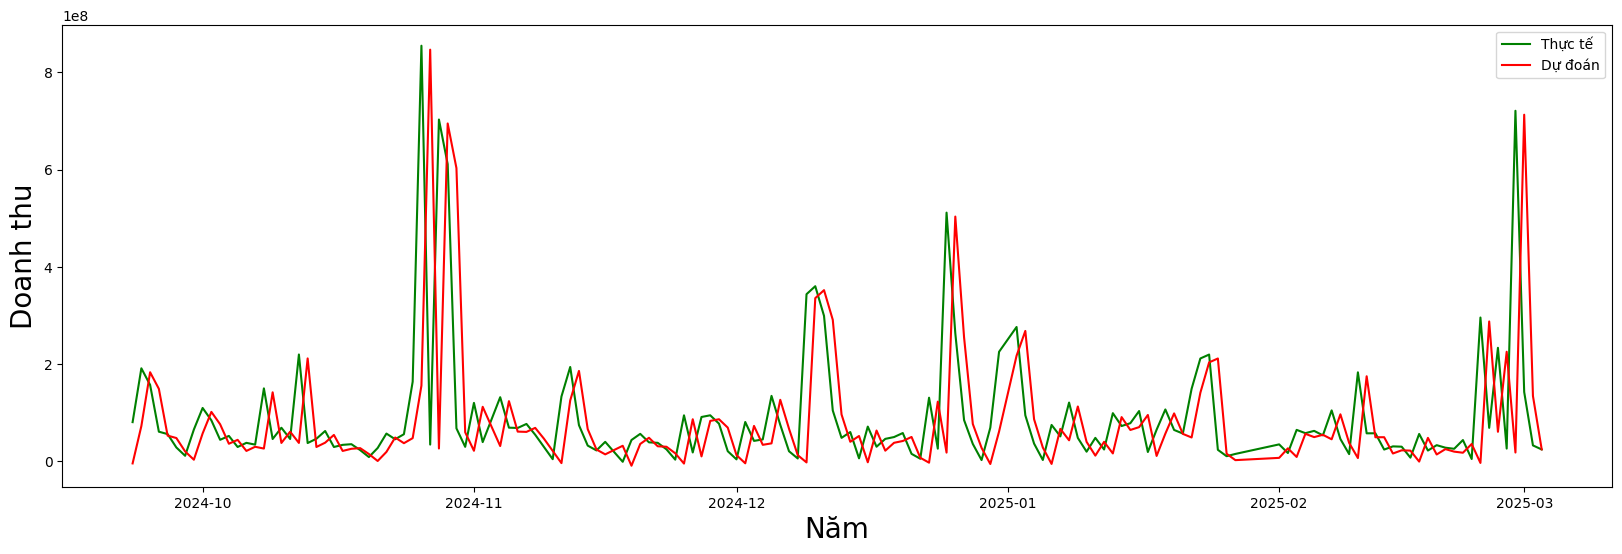

In [61]:
data.reset_index(drop = True, inplace = True)
data_result.reset_index(drop = True, inplace = True)

# Kết hợp 2 bảng để đồ thị hóa tạo biểu đồ
data_sales_pred = pd.merge(data, data_result,on='date',how='right')

plt.figure(figsize=(20, 6))
plt.plot(data_sales_pred['date'], data_sales_pred['total_sales'][len(data_sales_pred) - len(data_result): ], color='green')
plt.plot(data_sales_pred['date'], data_sales_pred['pred_value'], color='red')
plt.xlabel('Năm', size=20)
plt.ylabel('Doanh thu', size=20)
plt.legend(['Thực tế', 'Dự đoán'],loc='upper right')
plt.show()